# Lab 03 - NLP - Named Entity Recognition

In [1]:
from itertools import chain
import nltk
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay 
from sklearn.preprocessing import MultiLabelBinarizer
import sklearn
import pycrfsuite
from nltk.corpus.reader import ConllChunkCorpusReader
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from seqeval.scheme import IOB1
import codecs
import matplotlib.pyplot as plt
import pandas as pd
mlb = MultiLabelBinarizer()

## Reading Train/Test Data

In [2]:
mycorpus = ConllChunkCorpusReader(r"PA/", r".*train",chunk_types="pos")
train_corpus = []
for tree in mycorpus.tagged_sents():
    train_corpus.append(tree)
    
print(len(train_corpus))
# print(train_corpus[1])

100


In [3]:
mycorpus = ConllChunkCorpusReader(r"PA/", r".*test",chunk_types="pos")
test_corpus = []
for tree in mycorpus.tagged_sents():
    test_corpus.append(tree)
print(len(test_corpus))
# print(test_corpus[1])

100


## Features
Next, define some features. In this example we use word identity, word suffix, word shape; also, some information from nearby words is used.

In [4]:
#Every word is represented by a set of features. CRF allows us to give any arbitrary set of features
def word2features(sent, i):
    word = sent[i][0]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
    ]
    if i > 0:
        word1 = sent[i-1][0]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('BOS')
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('EOS')
                
    return features

def word2featuresTest(sent, i):
    word = sent[i]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
    ]
    if i > 0:
        word1 = sent[i-1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('BOS')
        
    if i < len(sent)-1:
        word1 = sent[i+1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('EOS')
                
    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2featuresTest(sent):
    return [word2featuresTest(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

def sent2tokens(sent):
    return [token for token, label in sent]

In [5]:
X_train = [sent2features(s) for s in train_corpus]
y_train = [sent2labels(s) for s in train_corpus]

X_test = [sent2features(s) for s in test_corpus]
y_test = [sent2labels(s) for s in test_corpus]

print(train_corpus[5][0])
print(X_train[5][0])

('pa:ਰੀਡਿਰੈਕਟ', 'O')
['bias', 'word.lower=pa:ਰੀਡਿਰੈਕਟ', 'word[-3:]=ੈਕਟ', 'word[-2:]=ਕਟ', 'word.isupper=False', 'word.istitle=False', 'word.isdigit=False', 'BOS', '+1:word.lower=pa:ਟਾਈਮ', '+1:word.istitle=False', '+1:word.isupper=False']


In [6]:
trainer = pycrfsuite.Trainer(verbose=False)

for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)
y_train = mlb.fit_transform(y_train) #Fitting the y_train with help of MultiLabelBinarizer

## Trying different combinations of Hperparameters containing Model training, predictions obtaining and dumping predictions to Disk. 

F1 Score is=
0.4126984126984127
Classification report=
              precision    recall  f1-score   support

         LOC       1.00      0.06      0.11        33
         ORG       0.41      0.90      0.56        31
         PER       0.60      0.23      0.33        39

   micro avg       0.45      0.38      0.41       103
   macro avg       0.67      0.40      0.34       103
weighted avg       0.67      0.38      0.33       103

Confusion matrix=
[[ 2 15  4 11]
 [ 0 30  1  0]
 [ 0 24 10  3]
 [ 0  0  0  0]]


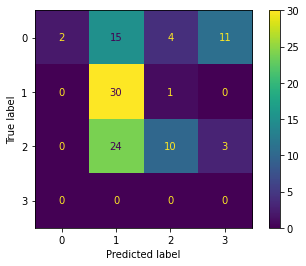

C1 & c2 = 1 1
Weighted F1 Score=
0.331373092926491

F1 Score is=
0.6237623762376238
Classification report=
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


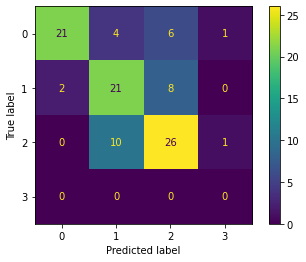

C1 & c2 = 1 0.01
Weighted F1 Score=
0.6246924666682214

F1 Score is=
0.5841584158415842
Classification report=
              precision    recall  f1-score   support

         LOC       0.81      0.52      0.63        33
         ORG       0.46      0.81      0.59        31
         PER       0.71      0.44      0.54        39

   micro avg       0.60      0.57      0.58       103
   macro avg       0.66      0.59      0.59       103
weighted avg       0.67      0.57      0.58       103

Confusion matrix=
[[19  9  3  1]
 [ 2 26  3  0]
 [ 0 19 18  0]
 [ 0  0  0  0]]


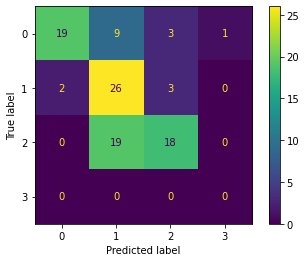

C1 & c2 = 0.001 0.0001
Weighted F1 Score=
0.583113504301397

F1 Score is=
0.5812807881773399
Classification report=
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.48      0.84      0.61        31
         PER       0.65      0.38      0.48        39

   micro avg       0.59      0.57      0.58       103
   macro avg       0.64      0.59      0.58       103
weighted avg       0.64      0.57      0.57       103

Confusion matrix=
[[21  7  3  1]
 [ 2 26  3  0]
 [ 0 20 17  0]
 [ 0  0  0  0]]


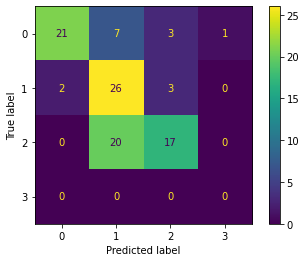

C1 & c2 = 0.01 0.001
Weighted F1 Score=
0.5733005761026616

F1 Score is=
0.5882352941176471
Classification report=
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.46      0.81      0.59        31
         PER       0.71      0.44      0.54        39

   micro avg       0.59      0.58      0.59       103
   macro avg       0.65      0.60      0.59       103
weighted avg       0.66      0.58      0.59       103

Confusion matrix=
[[20  9  3]
 [ 3 25  3]
 [ 0 19 18]]


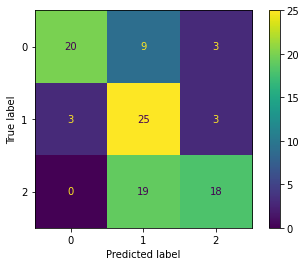

C1 & c2 = 0.0001 1e-06
Weighted F1 Score=
0.587351445432542

F1 Score is=
0.6039603960396039
Classification report=
              precision    recall  f1-score   support

         LOC       0.89      0.52      0.65        33
         ORG       0.51      0.71      0.59        31
         PER       0.59      0.56      0.58        39

   micro avg       0.62      0.59      0.60       103
   macro avg       0.67      0.60      0.61       103
weighted avg       0.67      0.59      0.61       103

Confusion matrix=
[[19  7  5  1]
 [ 0 23  8  0]
 [ 0 13 24  0]
 [ 0  0  0  0]]


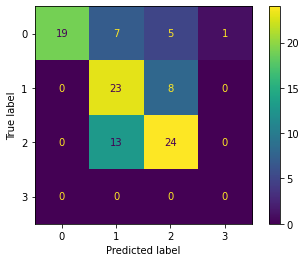

C1 & c2 = 1 0.0001
Weighted F1 Score=
0.6076534259978308

F1 Score is=
0.5784313725490196
Classification report=
              precision    recall  f1-score   support

         LOC       0.83      0.58      0.68        33
         ORG       0.47      0.81      0.60        31
         PER       0.60      0.38      0.47        39

   micro avg       0.58      0.57      0.58       103
   macro avg       0.63      0.59      0.58       103
weighted avg       0.63      0.57      0.57       103

Confusion matrix=
[[21  7  3  1]
 [ 2 25  4  0]
 [ 0 20 17  0]
 [ 0  0  0  0]]


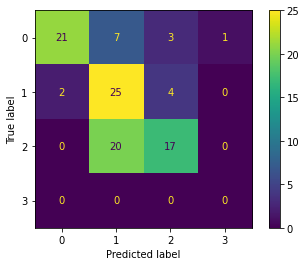

C1 & c2 = 0.01 1e-05
Weighted F1 Score=
0.5740435737401758



In [7]:
a = [1, 1, 1e-3, 1e-2, 1e-4,1,1e-2]
b = [1, 1e-2, 1e-4, 1e-3, 1e-6,1e-4,1e-5]
sc = [] # To store F1 score for all combinations.
for i in range(len(a)):
        
                trainer.set_params({
                    'c1': a[i],   
                    'c2' : b[i],  
                    'max_iterations': 100,  
                    'feature.possible_transitions': True
                })
                
                trainer.train('punjabi-ner.crfsuite')

                tagger = pycrfsuite.Tagger()
                tagger.open('punjabi-ner.crfsuite')

                
                y_pred = [tagger.tag(xseq) for xseq in X_test]
                
                
                with codecs.open('crf.out.txt', 'w', encoding='utf-8') as out_file:
                    for every_sent,pred_label in zip(test_corpus, y_pred):
                        for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                            out_file.write(every_word_correct_label[0] + "\t" 
                                           + every_word_correct_label[1] + "\t" + predicted_label)
                            out_file.write("\n")
                        out_file.write("\n")


                def conllReader(filename, word_field=0, label_field=1, prediction_field=2):
                    sentences_true_labels = []
                    sentences_pred_labels = []
                    true_list = []
                    pred_list = []
                    label_list = []

                    with codecs.open(filename, 'r', errors='ignore', encoding='utf8') as f_in:
                        for line in f_in:
                            line = line.strip()
                            if line:
                                if line.startswith('#'):
                                    continue
                                label = line.split('\t')[label_field]
                                pred = line.split('\t')[prediction_field]
                                true_list.append( label )
                                pred_list.append( pred )

                            else:
                                if len(true_list) > 0:
                                    sentences_true_labels.append( true_list )
                                    sentences_pred_labels.append( pred_list )
                                true_list = []
                                pred_list = []
                        f_in.close()

                    return sentences_true_labels, sentences_pred_labels



                true_labels, predicted_labels = conllReader("crf.out.txt")
                                
                print('F1 Score is=')
                print( f1_score(true_labels, predicted_labels) )

                print('Classification report=')
                print( classification_report(true_labels, predicted_labels, scheme=IOB1) )
                
                cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), 
                                      mlb.fit_transform(predicted_labels).argmax(axis=1))
                print("Confusion matrix=")
                print(cm)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.show()
                print("C1 & c2 =", a[i],b[i])
                print("Weighted F1 Score=")
                print(f1_score(true_labels, predicted_labels, average="weighted"))
                sc.append(f1_score(true_labels, predicted_labels, average="weighted"))
                print()
                
                
                
                


### After reviewing my results for F1_score, it is clearly visible that c1 = '1'  and c2 = '1e-2' will be a best fit for my Hperparameter settings with weighted F1_score of 0.6246924666682214 .

### Plotting the graph between c1,c2 and Weighted F1_score. 

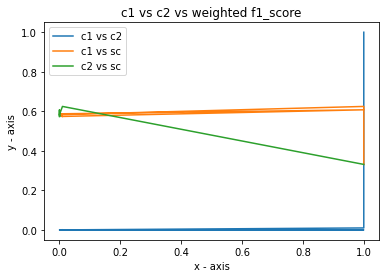

In [8]:
import matplotlib.pyplot as plt
# Here s denotes weighted F1_score
plt.plot(a, b, label = "c1 vs c2")
plt.plot(a, sc, label = "c1 vs sc")
plt.plot(b, sc, label = "c2 vs sc")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('c1 vs c2 vs weighted f1_score')
plt.legend()
plt.show()

### Plotting scatter pattern for better visualization 

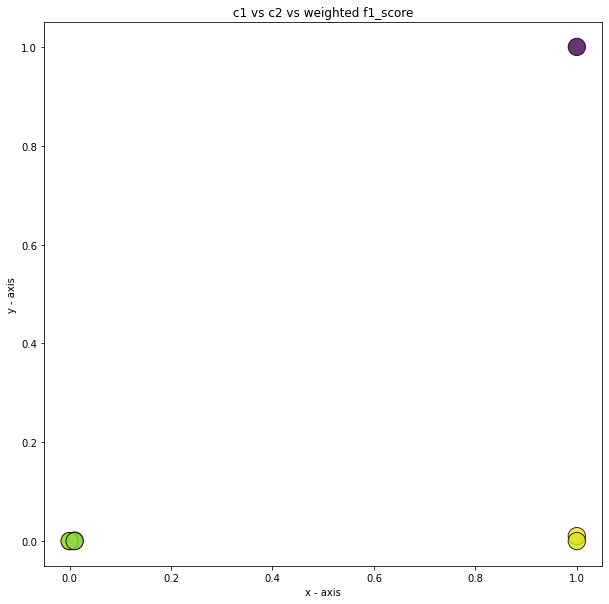

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(a, b,linewidths=1, alpha=.8, edgecolor='k', s = 300, c=sc)
plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('c1 vs c2 vs weighted f1_score')
plt.show()

### Confusion matrix for best Hyperparameter setting. 

F1 Score is=
0.6237623762376238
Classification report=
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


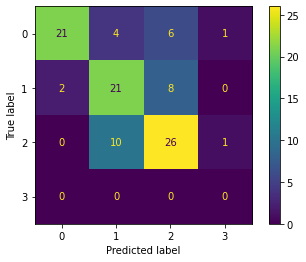

Weighted F1 Score=
0.6246924666682214


In [10]:
                trainer.set_params({
                    'c1': 1,   
                    'c2' : 1e-2,  
                    'max_iterations': 100,  
                    'feature.possible_transitions': True
                })
                
                trainer.train('punjabi-ner.crfsuite')

                tagger = pycrfsuite.Tagger()
                tagger.open('punjabi-ner.crfsuite')

                
                y_pred = [tagger.tag(xseq) for xseq in X_test]
                
                
                with codecs.open('crf.out.txt', 'w', encoding='utf-8') as out_file:
                    for every_sent,pred_label in zip(test_corpus, y_pred):
                        for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                            out_file.write(every_word_correct_label[0] + "\t" 
                                           + every_word_correct_label[1] + "\t" + predicted_label)
                            out_file.write("\n")
                        out_file.write("\n")


                def conllReader(filename, word_field=0, label_field=1, prediction_field=2):
                    sentences_true_labels = []
                    sentences_pred_labels = []
                    true_list = []
                    pred_list = []
                    label_list = []

                    with codecs.open(filename, 'r', errors='ignore', encoding='utf8') as f_in:
                        for line in f_in:
                            line = line.strip()
                            if line:
                                if line.startswith('#'):
                                    continue
                                label = line.split('\t')[label_field]
                                pred = line.split('\t')[prediction_field]
                                true_list.append( label )
                                pred_list.append( pred )

                            else:
                                if len(true_list) > 0:
                                    sentences_true_labels.append( true_list )
                                    sentences_pred_labels.append( pred_list )
                                true_list = []
                                pred_list = []
                        f_in.close()

                    return sentences_true_labels, sentences_pred_labels



                true_labels, predicted_labels = conllReader("crf.out.txt")
                                
                print('F1 Score is=')
                print( f1_score(true_labels, predicted_labels) )

                print('Classification report=')
                print( classification_report(true_labels, predicted_labels, scheme=IOB1) )
                
                cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), 
                                      mlb.fit_transform(predicted_labels).argmax(axis=1))
                print("Confusion matrix=")
                print(cm)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.show()
                
                print("Weighted F1 Score=")
                print(f1_score(true_labels, predicted_labels, average="weighted"))

## Attaching PoS Tagger-based features

In [11]:
postagger = pycrfsuite.Tagger()
postagger.open('punjabi-ner.crfsuite')

In [12]:
#Every word is represented by a set of features. CRF allows us to give any arbitrary set of features
def word2featurespos(sent, i):
    word = sent[i][0]
    postag = sent[i][2]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'postag=' + postag,
        'postag[:2]=' + postag[:2],
    ]
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][2]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:postag=' + postag1,
            '-1:postag[:2]=' + postag1[:2],
        ])
    else:
        features.append('BOS')
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][2]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:postag=' + postag1,
            '+1:postag[:2]=' + postag1[:2],
        ])
    else:
        features.append('EOS')
                
    return features

def sent2featurespos(sent, postagger):
    tagged = postagger.tag(sent2features(sent))
    sentNew = [word_nelabel+(pos, ) for word_nelabel,pos in zip(sent, tagged)]
    return [word2featurespos(sentNew, i) for i in range(len(sentNew))]

def sent2labelspos(sent):
    return [label for token, label in sent]

def sent2tokenspos(sent):
    return [token for token, label in sent]

In [13]:
for sent in train_corpus:
    print(sent)
    print("\n")
    s1 = postagger.tag(sent2features(sent))
    sentNew = [word_nelabel+(pos, ) for word_nelabel,pos in zip(sent, s1)]
    print(sentNew)
    break

[('pa:ਰੀਡਿਰੈਕਟ', 'O'), ('pa:ਰਬਿੰਦਰ', 'B-PER'), ('pa:ਨਾਥ', 'I-PER'), ('pa:ਟੈਗੋਰ', 'I-PER')]


[('pa:ਰੀਡਿਰੈਕਟ', 'O', 'O'), ('pa:ਰਬਿੰਦਰ', 'B-PER', 'B-PER'), ('pa:ਨਾਥ', 'I-PER', 'I-PER'), ('pa:ਟੈਗੋਰ', 'I-PER', 'I-PER')]


In [14]:
X_train_pos = [sent2featurespos(s, postagger) for s in train_corpus]
y_train_pos = [sent2labelspos(s) for s in train_corpus]

X_test_pos = [sent2featurespos(s, postagger) for s in test_corpus]
y_test_pos = [sent2labelspos(s) for s in test_corpus]

# print(X_train_pos[0][0])

In [15]:
trainerpos = pycrfsuite.Trainer(verbose=False)

for xseq, yseq in zip(X_train_pos, y_train_pos):
    trainerpos.append(xseq, yseq)

F1 Score is
0.6237623762376238
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


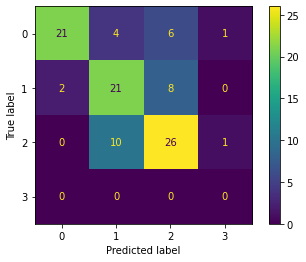

C1 & C2 = 1 1
Weighted F1 Score=
0.6246924666682214

F1 Score is
0.6237623762376238
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


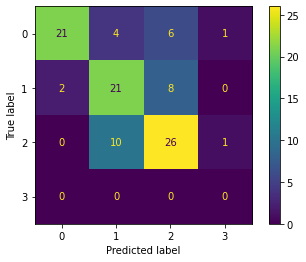

C1 & C2 = 1 0.01
Weighted F1 Score=
0.6246924666682214

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


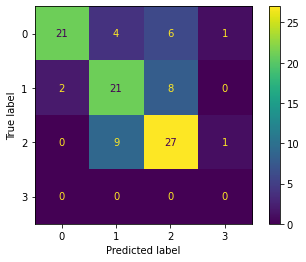

C1 & C2 = 0.001 0.0001
Weighted F1 Score=
0.643607363510276

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


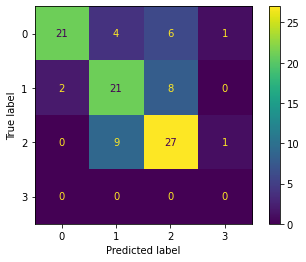

C1 & C2 = 0.01 0.001
Weighted F1 Score=
0.643607363510276

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


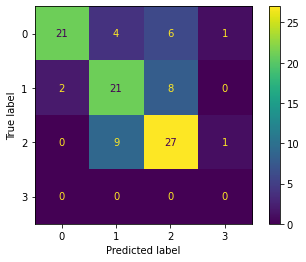

C1 & C2 = 0.0001 1e-06
Weighted F1 Score=
0.643607363510276

F1 Score is
0.6237623762376238
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


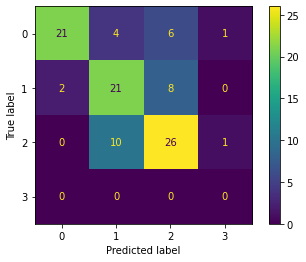

C1 & C2 = 1 0.0001
Weighted F1 Score=
0.6246924666682214

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


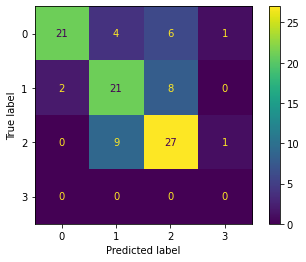

C1 & C2 = 0.01 1e-05
Weighted F1 Score=
0.643607363510276



In [16]:
a = [1, 1, 1e-3, 1e-2, 1e-4,1,1e-2]
b = [1, 1e-2, 1e-4, 1e-3, 1e-6,1e-4,1e-5]
sc1 = []
for i in range(len(a)):
    trainerpos.set_params({
    'c1': a[i],   # coefficient for L1 penalty
    'c2': b[i],  # coefficient for L2 penalty
    'max_iterations': 100,  # stop earlier

    # include transitions that are possible, but not observed
    'feature.possible_transitions': True
    })

    trainerpos.train('punjabi-ner-pos.crfsuite')

    taggerpos = pycrfsuite.Tagger()
    taggerpos.open('punjabi-ner-pos.crfsuite')

    y_pred_pos = [taggerpos.tag(xseq) for xseq in X_test_pos]

    with codecs.open('crf.out.pos.txt', 'w', encoding="utf-8") as out_file:
        for every_sent,pred_label in zip(test_corpus, y_pred_pos):
            for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                out_file.write(every_word_correct_label[0] + "\t" + every_word_correct_label[1] + "\t" + predicted_label)
                out_file.write("\n")
            out_file.write("\n")

    true_labels, predicted_labels = conllReader("crf.out.pos.txt")

    print('F1 Score is')
    print( f1_score(true_labels, predicted_labels) )

    print('Classification report')
    print( classification_report(true_labels, predicted_labels, scheme=IOB1) )

    cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), 
                          mlb.fit_transform(predicted_labels).argmax(axis=1))
    print("Confusion matrix=")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    print("C1 & C2 =",a[i],b[i])
    print("Weighted F1 Score=")
    print(f1_score(true_labels, predicted_labels, average="weighted"))
    sc1.append(f1_score(true_labels, predicted_labels, average="weighted"))
    print()

### After applying PoS-tagger based feature we can see that weighted F1_score is same for some of the Hyperparameters taken by me. Ex:- (c1,c2) = ( 1e-3,1e-4 ),( 1e-2,1e-3 ),( 1e-4,1e-6 ),( 1e-2,1e-5 )

### Plotting the graph between c1,c2 and Weighted F1_score. 

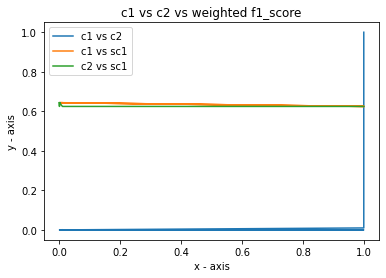

In [17]:
import matplotlib.pyplot as plt
# Here s denotes weighted F1_score
plt.plot(a, b, label = "c1 vs c2")
plt.plot(a, sc1, label = "c1 vs sc1")
plt.plot(b, sc1, label = "c2 vs sc1")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('c1 vs c2 vs weighted f1_score')
plt.legend()
plt.show()

### Plotting scatter for better visualization. 

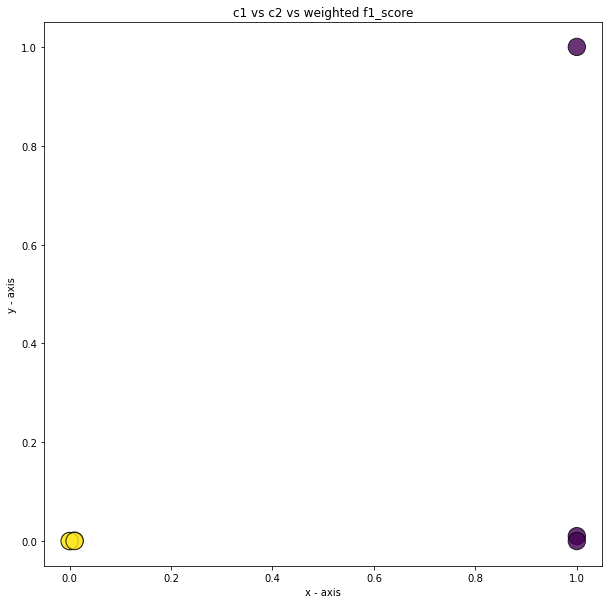

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(a, b, linewidths=1, alpha=.8, edgecolor='k', s = 300, c=sc1)
plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('c1 vs c2 vs weighted f1_score')
plt.show()

### Confusion matrix for best Hyperparameter setting. 

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


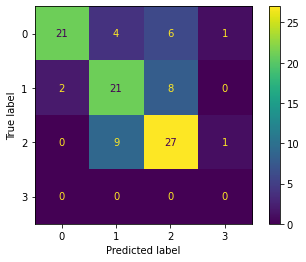

C1 & C2 = 0.001 0.0001
Weighted F1 Score=
0.643607363510276


In [19]:
    trainerpos.set_params({
    'c1': a[2],   # coefficient for L1 penalty
    'c2': b[2],  # coefficient for L2 penalty
    'max_iterations': 100,  # stop earlier

    # include transitions that are possible, but not observed
    'feature.possible_transitions': True
    })

    trainerpos.train('punjabi-ner-pos.crfsuite')

    taggerpos = pycrfsuite.Tagger()
    taggerpos.open('punjabi-ner-pos.crfsuite')

    y_pred_pos = [taggerpos.tag(xseq) for xseq in X_test_pos]

    with codecs.open('crf.out.pos.txt', 'w', encoding="utf-8") as out_file:
        for every_sent,pred_label in zip(test_corpus, y_pred_pos):
            for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                out_file.write(every_word_correct_label[0] + "\t" + every_word_correct_label[1] + "\t" + predicted_label)
                out_file.write("\n")
            out_file.write("\n")

    true_labels, predicted_labels = conllReader("crf.out.pos.txt")

    print('F1 Score is')
    print( f1_score(true_labels, predicted_labels) )

    print('Classification report')
    print( classification_report(true_labels, predicted_labels, scheme=IOB1) )

    cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), 
                          mlb.fit_transform(predicted_labels).argmax(axis=1))
    print("Confusion matrix=")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    print("C1 & C2 =",a[2],b[2])
    print("Weighted F1 Score=")
    print(f1_score(true_labels, predicted_labels, average="weighted"))

## Adding Gazatteer features

In [20]:
from nltk.corpus.reader import plaintext

In [21]:
personGazetteer = []

mycorpus = plaintext.PlaintextCorpusReader("./PA/", "dev")
person = []
for sent in mycorpus.words():
    person.append(sent)
    
mycorpus = plaintext.PlaintextCorpusReader("./PA/", "extra")
for sent in mycorpus.words():
    person.append(sent)

person = [name.lower() for name in person]
personGazetteer = set(person)

In [22]:
#Every word is represented by a set of features. CRF allows us to give any arbitrary set of features
def word2featuresGaz(sent, i, personGaz):
    word = sent[i][0]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'word.ispersongaz=%s' % (word.lower() in personGaz),
    ]
    if i > 0:
        word1 = sent[i-1][0]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('BOS')
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('EOS')
                
    return features

def word2featuresTest(sent, i):
    word = sent[i]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
    ]
    if i > 0:
        word1 = sent[i-1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('BOS')
        
    if i < len(sent)-1:
        word1 = sent[i+1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
        ])
    else:
        features.append('EOS')
                
    return features

def sent2featuresGaz(sent, personGaz):
    return [word2featuresGaz(sent, i, personGaz) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

def sent2tokens(sent):
    return [token for token, label in sent]

In [23]:
X_train_gaz = [sent2featuresGaz(s, personGazetteer) for s in train_corpus]
y_train_gaz = [sent2labels(s) for s in train_corpus]

X_test_gaz = [sent2featuresGaz(s, personGazetteer) for s in test_corpus]
y_test_gaz = [sent2labels(s) for s in test_corpus]

In [24]:
trainergaz = pycrfsuite.Trainer(verbose=False)

for xseq, yseq in zip(X_train_gaz, y_train_gaz):
    trainergaz.append(xseq, yseq)

F1 Score is
0.4126984126984127
Classification report
              precision    recall  f1-score   support

         LOC       1.00      0.06      0.11        33
         ORG       0.41      0.90      0.56        31
         PER       0.60      0.23      0.33        39

   micro avg       0.45      0.38      0.41       103
   macro avg       0.67      0.40      0.34       103
weighted avg       0.67      0.38      0.33       103

Confusion matrix=
[[ 2 15  4 11]
 [ 0 30  1  0]
 [ 0 24 10  3]
 [ 0  0  0  0]]


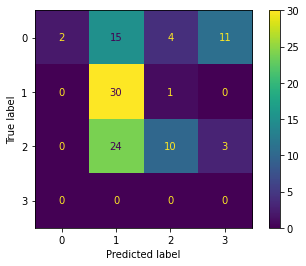

Weighted F1 Score=
0.331373092926491

F1 Score is
0.5643564356435643
Classification report
              precision    recall  f1-score   support

         LOC       0.85      0.52      0.64        33
         ORG       0.49      0.84      0.62        31
         PER       0.54      0.36      0.43        39

   micro avg       0.58      0.55      0.56       103
   macro avg       0.63      0.57      0.56       103
weighted avg       0.62      0.55      0.55       103

Confusion matrix=
[[19  6  6  1]
 [ 1 26  4  0]
 [ 0 20 16  1]
 [ 0  0  0  0]]


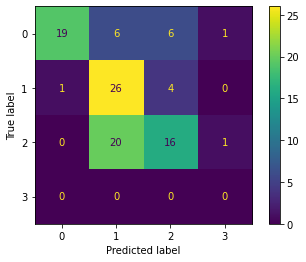

Weighted F1 Score=
0.5549542476818534

F1 Score is
0.5714285714285715
Classification report
              precision    recall  f1-score   support

         LOC       0.77      0.52      0.62        33
         ORG       0.46      0.81      0.59        31
         PER       0.67      0.41      0.51        39

   micro avg       0.58      0.56      0.57       103
   macro avg       0.63      0.58      0.57       103
weighted avg       0.64      0.56      0.57       103

Confusion matrix=
[[19  9  3  1]
 [ 3 25  3  0]
 [ 0 19 18  0]
 [ 0  0  0  0]]


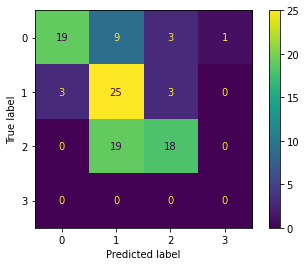

Weighted F1 Score=
0.5674254167686492

F1 Score is
0.5615763546798028
Classification report
              precision    recall  f1-score   support

         LOC       0.74      0.52      0.61        33
         ORG       0.46      0.77      0.58        31
         PER       0.64      0.41      0.50        39

   micro avg       0.57      0.55      0.56       103
   macro avg       0.61      0.57      0.56       103
weighted avg       0.62      0.55      0.56       103

Confusion matrix=
[[20  8  3  1]
 [ 3 24  4  0]
 [ 0 19 18  0]
 [ 0  0  0  0]]


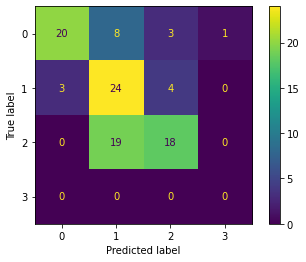

Weighted F1 Score=
0.5578973313503668

F1 Score is
0.5615763546798028
Classification report
              precision    recall  f1-score   support

         LOC       0.73      0.48      0.58        33
         ORG       0.46      0.81      0.59        31
         PER       0.67      0.41      0.51        39

   micro avg       0.57      0.55      0.56       103
   macro avg       0.62      0.57      0.56       103
weighted avg       0.62      0.55      0.56       103

Confusion matrix=
[[19  9  3  1]
 [ 3 25  3  0]
 [ 0 19 18  0]
 [ 0  0  0  0]]


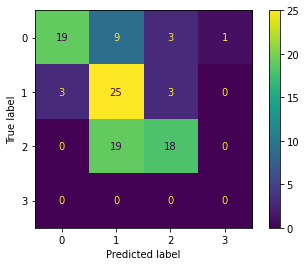

Weighted F1 Score=
0.555774931331756

F1 Score is
0.5572139303482587
Classification report
              precision    recall  f1-score   support

         LOC       0.89      0.52      0.65        33
         ORG       0.48      0.84      0.61        31
         PER       0.52      0.33      0.41        39

   micro avg       0.57      0.54      0.56       103
   macro avg       0.63      0.56      0.56       103
weighted avg       0.63      0.54      0.55       103

Confusion matrix=
[[19  7  5  1]
 [ 0 27  4  0]
 [ 0 20 16  1]
 [ 0  0  0  0]]


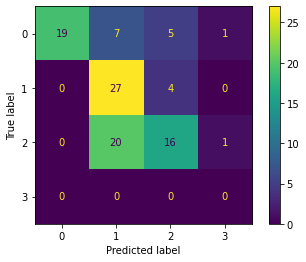

Weighted F1 Score=
0.5474308636822913

F1 Score is
0.5784313725490196
Classification report
              precision    recall  f1-score   support

         LOC       0.75      0.55      0.63        33
         ORG       0.49      0.81      0.61        31
         PER       0.62      0.41      0.49        39

   micro avg       0.58      0.57      0.58       103
   macro avg       0.62      0.59      0.58       103
weighted avg       0.62      0.57      0.57       103

Confusion matrix=
[[22  6  3  1]
 [ 2 25  4  0]
 [ 0 19 18  0]
 [ 0  0  0  0]]


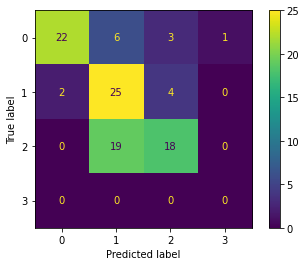

Weighted F1 Score=
0.5722771290053218



In [25]:
sc2 = []
for i in range(len(a)):
    trainergaz.set_params({
    'c1': a[i],   # coefficient for L1 penalty
    'c2': b[i],  # coefficient for L2 penalty
    'max_iterations': 150,  # stop earlier

    # include transitions that are possible, but not observed
    'feature.possible_transitions': True
    })

    trainergaz.train('punjabi-ner-gaz.crfsuite')

    taggergaz = pycrfsuite.Tagger()
    taggergaz.open('punjabi-ner-gaz.crfsuite')

    y_pred_gaz = [taggergaz.tag(xseq) for xseq in X_test_gaz]

    with codecs.open('crf.out.gaz.txt', 'w',encoding="utf-8") as out_file:
        for every_sent,pred_label in zip(test_corpus, y_pred_gaz):
            for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                out_file.write(every_word_correct_label[0] + "\t" + every_word_correct_label[1] + "\t" + predicted_label)
                out_file.write("\n")
            out_file.write("\n")
        
    true_labels, predicted_labels = conllReader("crf.out.gaz.txt")

    print('F1 Score is')
    print( f1_score(true_labels, predicted_labels) )

    print('Classification report')
    print( classification_report(true_labels, predicted_labels, scheme=IOB1) )

    cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), mlb.fit_transform(predicted_labels).argmax(axis=1))
    print("Confusion matrix=")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    print("Weighted F1 Score=")

    print(f1_score(true_labels, predicted_labels, average="weighted"))
    sc2.append(f1_score(true_labels, predicted_labels, average="weighted"))
    print()

### Weighted F1_score is best for ( 1e-2, 1e-5 ) Hyperparameter setting. 

### Plotting the graph and scatter plot. 

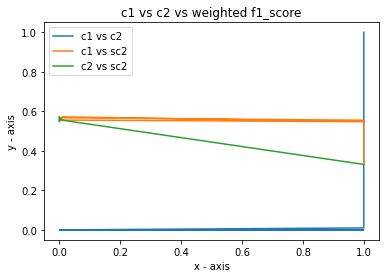

In [26]:
import matplotlib.pyplot as plt
# Here s denotes weighted F1_score
plt.plot(a, b, label = "c1 vs c2")
plt.plot(a, sc2, label = "c1 vs sc2")
plt.plot(b, sc2, label = "c2 vs sc2")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('c1 vs c2 vs weighted f1_score')
plt.legend()
plt.show()

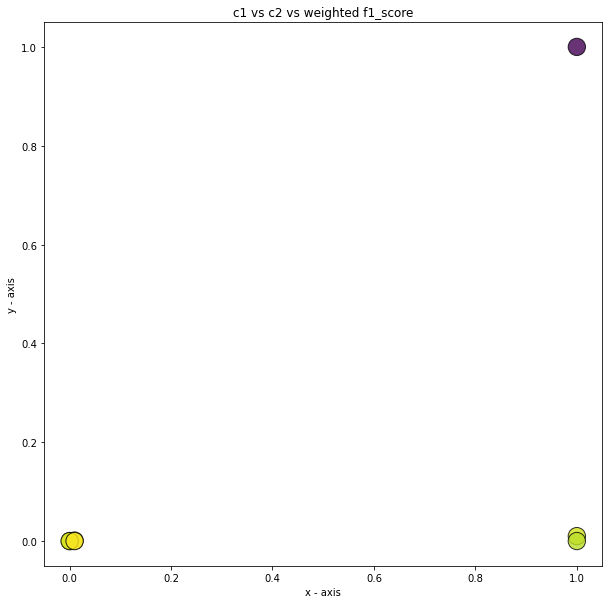

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(a, b, linewidths=1, alpha=.8, edgecolor='k', s = 300, c=sc2)
plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('c1 vs c2 vs weighted f1_score')
plt.show()

### Confusion matrix for best Hyperparameter setting. 

F1 Score is
0.5784313725490196
Classification report
              precision    recall  f1-score   support

         LOC       0.75      0.55      0.63        33
         ORG       0.49      0.81      0.61        31
         PER       0.62      0.41      0.49        39

   micro avg       0.58      0.57      0.58       103
   macro avg       0.62      0.59      0.58       103
weighted avg       0.62      0.57      0.57       103

Confusion matrix=
[[22  6  3  1]
 [ 2 25  4  0]
 [ 0 19 18  0]
 [ 0  0  0  0]]


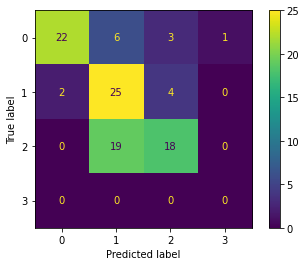

 c1 & c2 = 0.01 1e-05
Weighted F1 Score=
0.5722771290053218


In [28]:
    trainergaz.set_params({
    'c1': 1e-2,   # coefficient for L1 penalty
    'c2': 1e-5,  # coefficient for L2 penalty
    'max_iterations': 150,  # stop earlier

    # include transitions that are possible, but not observed
    'feature.possible_transitions': True
    })

    trainergaz.train('punjabi-ner-gaz.crfsuite')

    taggergaz = pycrfsuite.Tagger()
    taggergaz.open('punjabi-ner-gaz.crfsuite')

    y_pred_gaz = [taggergaz.tag(xseq) for xseq in X_test_gaz]

    with codecs.open('crf.out.gaz.txt', 'w',encoding="utf-8") as out_file:
        for every_sent,pred_label in zip(test_corpus, y_pred_gaz):
            for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                out_file.write(every_word_correct_label[0] + "\t" + every_word_correct_label[1] + "\t" + predicted_label)
                out_file.write("\n")
            out_file.write("\n")
        
    true_labels, predicted_labels = conllReader("crf.out.gaz.txt")

    print('F1 Score is')
    print( f1_score(true_labels, predicted_labels) )

    print('Classification report')
    print( classification_report(true_labels, predicted_labels, scheme=IOB1) )

    cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), mlb.fit_transform(predicted_labels).argmax(axis=1))
    print("Confusion matrix=")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    print(" c1 & c2 =", a[6],b[6])
    print("Weighted F1 Score=")

    print(f1_score(true_labels, predicted_labels, average="weighted"))

### Here F1_score for all Hyperparameters is same so no need to write full code 

## Adding PoS Tag feature with the Gazetteer Feature

In [29]:
#Every word is represented by a set of features. CRF allows us to give any arbitrary set of features
def word2featuresposGaz(sent, i, personGaz):
    word = sent[i][0]
    postag = sent[i][2]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'postag=' + postag,
        'postag[:2]=' + postag[:2],
        'word.ispersongaz=%s' % (word.lower() in personGaz),
    ]
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][2]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:postag=' + postag1,
            '-1:postag[:2]=' + postag1[:2],
        ])
    else:
        features.append('BOS')
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][2]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:postag=' + postag1,
            '+1:postag[:2]=' + postag1[:2],
        ])
    else:
        features.append('EOS')
                
    return features

def sent2featuresposGaz(sent, personGaz, postagger):
    tagged = postagger.tag(sent2features(sent))
    sentNew = [word_nelabel+(pos, ) for word_nelabel,pos in zip(sent, tagged)]
    return [word2featuresposGaz(sentNew, i, personGaz) for i in range(len(sentNew))]

def sent2labels(sent):
    return [label for token, label in sent]

def sent2tokens(sent):
    return [token for token, label in sent]

In [30]:
X_train_pos_gaz = [sent2featuresposGaz(s, personGazetteer, postagger) for s in train_corpus]
y_train_pos_gaz = [sent2labels(s) for s in train_corpus]

X_test_pos_gaz = [sent2featuresposGaz(s, personGazetteer,postagger) for s in test_corpus]
y_test_pos_gaz = [sent2labels(s) for s in test_corpus]

In [31]:
trainerposgaz = pycrfsuite.Trainer(verbose=False)

for xseq, yseq in zip(X_train_pos_gaz, y_train_pos_gaz):
    trainerposgaz.append(xseq, yseq)

F1 Score is
0.6237623762376238
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


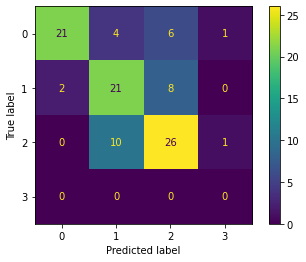

Weighted F1 Score=
0.6246924666682214

F1 Score is
0.6237623762376238
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


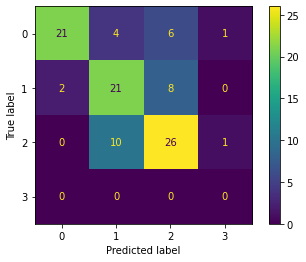

Weighted F1 Score=
0.6246924666682214

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


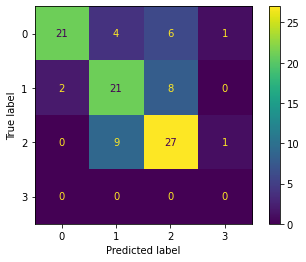

Weighted F1 Score=
0.643607363510276

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


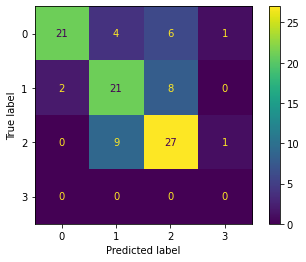

Weighted F1 Score=
0.643607363510276

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


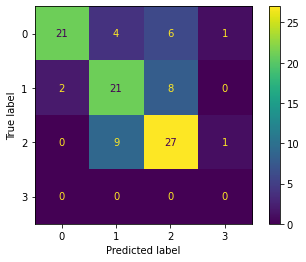

Weighted F1 Score=
0.643607363510276

F1 Score is
0.6237623762376238
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.58      0.68      0.63        31
         PER       0.60      0.62      0.61        39

   micro avg       0.64      0.61      0.62       103
   macro avg       0.66      0.61      0.63       103
weighted avg       0.65      0.61      0.62       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0 10 26  1]
 [ 0  0  0  0]]


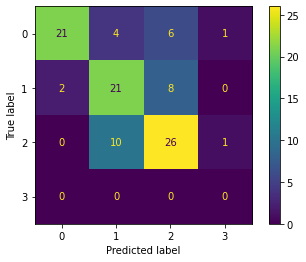

Weighted F1 Score=
0.6246924666682214

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


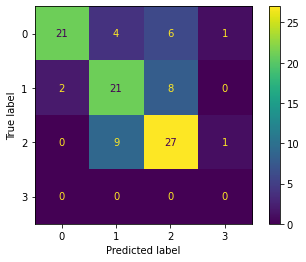

Weighted F1 Score=
0.643607363510276



In [32]:
sc3 = []
for i in range(len(a)):
    trainerposgaz.set_params({
    'c1': a[i],   # coefficient for L1 penalty
    'c2': b[i],  # coefficient for L2 penalty
    'max_iterations': 150,  # stop earlier

    # include transitions that are possible, but not observed
    'feature.possible_transitions': True
    })
    
    trainerposgaz.train('punjabi-ner-pos-gaz.crfsuite')
    
    taggerposgaz = pycrfsuite.Tagger()
    taggerposgaz.open('punjabi-ner-pos-gaz.crfsuite')
    
    y_pred_pos_gaz = [taggerposgaz.tag(xseq) for xseq in X_test_pos_gaz]
    with codecs.open('crf.out.pos.gaz.txt', 'w',encoding="utf-8") as out_file:
        for every_sent,pred_label in zip(test_corpus, y_pred_pos_gaz):
            for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                out_file.write(every_word_correct_label[0] + "\t" + every_word_correct_label[1] + "\t" + predicted_label)
                out_file.write("\n")
            out_file.write("\n")
    true_labels, predicted_labels = conllReader("crf.out.pos.gaz.txt")
    
    print('F1 Score is')
    print( f1_score(true_labels, predicted_labels) )

    print('Classification report')
    print( classification_report(true_labels, predicted_labels, scheme=IOB1) )
    cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), mlb.fit_transform(predicted_labels).argmax(axis=1))
    print("Confusion matrix=")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    print("Weighted F1 Score=")

    print(f1_score(true_labels, predicted_labels, average="weighted"))
    sc3.append(f1_score(true_labels, predicted_labels, average="weighted"))
    print()

### After applying PoS-tagger with tagging Gazetter feature we can see that weighted F1_score is same for some of the Hyperparameters taken by me. Ex:- (c1,c2) = ( 1e-3,1e-4 ),( 1e-2,1e-3 ),( 1e-4,1e-6 ),( 1e-2,1e-5 )

### Plotting the graph and scatter plot. 

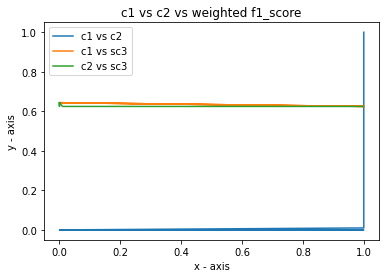

In [33]:
import matplotlib.pyplot as plt
# Here s denotes weighted F1_score
plt.plot(a, b, label = "c1 vs c2")
plt.plot(a, sc3, label = "c1 vs sc3")
plt.plot(b, sc3, label = "c2 vs sc3")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('c1 vs c2 vs weighted f1_score')
plt.legend()
plt.show()

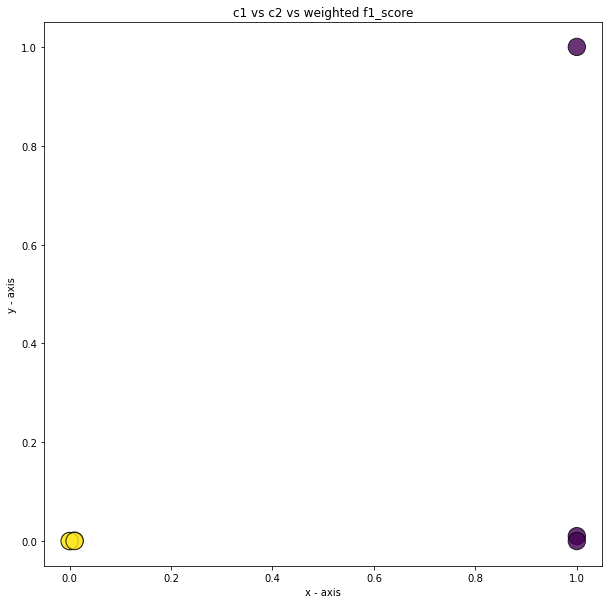

In [34]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(a, b, linewidths=1, alpha=.8, edgecolor='k', s = 300, c=sc3)
plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('c1 vs c2 vs weighted f1_score')
plt.show()

### Plotting confusion matrix for best Hyperparameter setting. 

F1 Score is
0.6435643564356436
Classification report
              precision    recall  f1-score   support

         LOC       0.78      0.55      0.64        33
         ORG       0.60      0.68      0.64        31
         PER       0.63      0.67      0.65        39

   micro avg       0.66      0.63      0.64       103
   macro avg       0.67      0.63      0.64       103
weighted avg       0.67      0.63      0.64       103

Confusion matrix=
[[21  4  6  1]
 [ 2 21  8  0]
 [ 0  9 27  1]
 [ 0  0  0  0]]


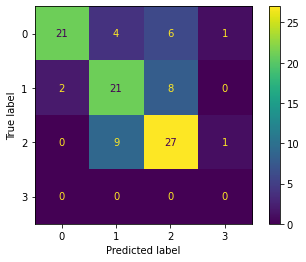

c1 & c2 = 0.001 0.0001
Weighted F1 Score=
0.643607363510276


In [35]:
    trainerposgaz.set_params({
    'c1': a[2],   # coefficient for L1 penalty
    'c2': b[2],  # coefficient for L2 penalty
    'max_iterations': 150,  # stop earlier

    # include transitions that are possible, but not observed
    'feature.possible_transitions': True
    })
    
    trainerposgaz.train('punjabi-ner-pos-gaz.crfsuite')
    
    taggerposgaz = pycrfsuite.Tagger()
    taggerposgaz.open('punjabi-ner-pos-gaz.crfsuite')
    
    y_pred_pos_gaz = [taggerposgaz.tag(xseq) for xseq in X_test_pos_gaz]
    with codecs.open('crf.out.pos.gaz.txt', 'w',encoding="utf-8") as out_file:
        for every_sent,pred_label in zip(test_corpus, y_pred_pos_gaz):
            for every_word_correct_label,predicted_label in zip(every_sent, pred_label):
                out_file.write(every_word_correct_label[0] + "\t" + every_word_correct_label[1] + "\t" + predicted_label)
                out_file.write("\n")
            out_file.write("\n")
    true_labels, predicted_labels = conllReader("crf.out.pos.gaz.txt")
    
    print('F1 Score is')
    print( f1_score(true_labels, predicted_labels) )

    print('Classification report')
    print( classification_report(true_labels, predicted_labels, scheme=IOB1) )
    cm = confusion_matrix(mlb.fit_transform(true_labels).argmax(axis=1), mlb.fit_transform(predicted_labels).argmax(axis=1))
    print("Confusion matrix=")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    print("c1 & c2 =",a[2],b[2])
    print("Weighted F1 Score=")

    print(f1_score(true_labels, predicted_labels, average="weighted"))

### This finishes work for the lab Assignment 3